# Assignment 1, Part A: Analysing Text Data

# Isobel Rowe, 30042585



## Step 01

First, I create a SparkContext object.

I check to see if there is an existing context, and if not create a new one called 'sc'. The specification that the application runs locally with 'as many working processors as logical cores on your machine' is met by using `master="local[*]"` and the appropriate application name is met using `appName="Assignment 1: part A"`.


In [2]:
from pyspark import SparkContext

# Check if there is an existing spark context - if not, make a new one.
sc = SparkContext.getOrCreate()

# If there is no existing spark context, we now create a new context
if (sc is None):
    sc = SparkContext(master="local[*]", appName="Assignment 1: part A")
    

## Step 02


Next, to convert the text files into RDDs, I use the `SparkContext.textFile()` method.

Then, I use `.count()` action to count the number of lines in each textfile.


<font color='red'>Please note: in this assignment I have shortened 'Agile Processes  in Software Engineering  and Extreme Programming.txt' to just 'Agile Processes'.</font>


In [3]:
# Loading Agile Processes... textfile
APSEEP = sc.textFile('Agile Processes.txt')
# Displaying the number of lines
print('Total number of lines in Agile Processes: ', APSEEP.count())

# Loading Scrum Handbook textfile
SH = sc.textFile('Scrum Handbook.txt')
# Displaying the number of lines
print('Total number of lines in Scrum Handbook: ', SH.count())


Total number of lines in Agile Processes:  21569
Total number of lines in Scrum Handbook:  4617


## Step 03


In this step, I use the re library to clean the text file by declaring a function that:
- Removes all non-alphabet characters except spaces;
- Converts uppercase letters to lowercase; and
- Removes all leading and trailing spaces.
    


In [4]:
# Import the necessary library
import re

# Initialse the function
def clean(lines):
    
    # 1: Remove non-alpha characters
    lines = re.sub('[^a-zA-Z\s]+', '', lines)
    # 2: Lowercase using string method
    lines = lines.lower()
    # 3: Leading/trailing whitespace
    lines = re.sub('^[ \t]+|[ \t]+$', '', lines)
    
    return lines


Then, I use the `.map()` transformation to apply this function to the RDDs, and display the contents using `.take(100)` as displaying the entire contents is surplus to requirements.


In [5]:
# Apply the function to the RDD using .map()
APSEEP = APSEEP.map(clean)

# Display the cleaned file
print('Contents of Agile Processes(...): \n\n', APSEEP.take(100))


Contents of Agile Processes(...): 

 ['lnbip', '', '', 'i helen sharp', '', 'tracy hall eds', '', 'agile processes', 'in software engineering', 'and extreme programming', '', 'th international conference xp', 'edinburgh uk may', 'proceedings', '', '', 'springer open', '', '', '', '', '', '', '', 'lecture notes', '', 'in business information processing', '', '', 'series editors', '', 'wil van der aalst', '', 'eindhoven technical university eindhoven the netherlands', 'john mylopoulos', '', 'university of trento povo italy', 'michael rosemann', '', 'queensland university of technology brisbane qld australia', 'michael j shaw', '', 'university of illinois urbanachampaign il usa', 'clemens szyperski', '', 'microsoft research redmond wa usa', '', '', '', 'more information about this series at httpwwwspringercomseries', '', '', '', 'helen sharp  tracy hall eds', '', '', 'agile processes', 'in software engineering', 'and extreme programming', '', 'th international conference xp', 'edinburgh u

In [6]:
# Apply the function to the RDD using .map()
SH = SH.map(clean)

# Display the cleaned file
print('Contents of Scrum Handbook: \n\n', SH.take(100))


Contents of Scrum Handbook: 

 ['jeff sutherlands', '', 'scrum handbook', '', '', '', '', 'everything', 'you need', 'to know', 'to start', '', 'a scrum project', 'in your', 'organization', '', 'scrum', '', 'training', '', 'institute', '', 'm w press', '', '', '', 'this book is dedicated to nobel laureate muhammad yunus and the', 'grameen bank for originating microenterprise development and the', 'accion international presidents advisory board responsible for much of', 'microenterprise development in the western hemisphere', '', 'the strategy for bootstrapping the poor out of poverty has been', 'a model for freeing hundreds of thousands of software developers from', 'developer abuse caused by poor management practices', '', 'thanks to the reviewers of the text who include among many others', '', 'tom poppendieck', '', 'hen rick kniberg', '', 'rowan bunning', '', 'clifford thompson', '', '', '', 'about this book', '', 'this manual is based on the scrum papers published by the scrum', 'tr

## Step 04

First, I find the key value pairs. I did this by using: 
- use `.flatmap()` to split (or tokenise) each word;
- use `.map()` to create key value pairs for each token;
- use `.reduceByKey()` to count each token; and
- use `.sortBy()` to order to key value pairs by frequency, ready for the next step.

In addition, I added a `.filter()` to filter anything of zero-length because I noticed in the previous section's output that there are a lot of blank spaces - around 2,500 for each text. Although the assignment specification didn't explicitly mention this, I think it's best to remove these as they constiture noise in the data, and would skew the results for the following sections.


    
Finally, I can display the 20 most frequent words by using `.take(20)`, which returns the first x amount of elements from the RDD.

In [7]:
# Split into individual words (tokenise)
APSEEP_KV = APSEEP.flatMap(lambda line: line.split(' ')) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False) \
    .filter(lambda x: len(x[0]) > 0)

# Display the top 20 most frequent
print('Top 20 most frequent words in Agile Processes: ')
APSEEP_KV.take(20)


Top 20 most frequent words in Agile Processes: 


[('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028),
 ('on', 1015),
 ('we', 975),
 ('with', 969),
 ('software', 922),
 ('this', 915),
 ('are', 784),
 ('agile', 748),
 ('it', 741),
 ('development', 737),
 ('was', 711)]

In [8]:
# Split into individual words (tokenise)
SH_KV = SH.flatMap(lambda line: line.split(' ')) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False) \
    .filter(lambda x: len(x[0]) > 0)\

# Display the top 20 most frequent
print('Top 20 most frequent words in Scrum Handbook: ')
SH_KV.take(20)

Top 20 most frequent words in Scrum Handbook: 


[('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232),
 ('for', 195),
 ('that', 181),
 ('it', 165),
 ('on', 149),
 ('sprint', 146),
 ('this', 142),
 ('with', 132),
 ('as', 124),
 ('are', 119),
 ('by', 118)]

## Step 05

In order to remove the stopwords from the RDDs, I first import the list of stop words from the NLTK library. Then, I filter these out by using `.filter()` with a lambda function. Finally, I use `.count()` to find the number of unique words in each RDD.


In [9]:
# Import NLTK stopwords list
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Display to check 
print('Stop words: ', stop_words[0:10])


Stop words:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [10]:
# Filter out the stopwords from RDD
APSEEP_KV_STOP = APSEEP_KV.filter(lambda x: x[0] not in stop_words)
SH_KV_STOP = SH_KV.filter(lambda x: x[0] not in stop_words)

# Display the number of unique words
APSEEP_unique = APSEEP_KV_STOP.count()
print('Number of unique words in Agile Processes: ', APSEEP_unique)

SH_unique = SH_KV_STOP.count()
print('Number of unique words in Scrum Handbook: ', SH_unique)


Number of unique words in Agile Processes:  9611
Number of unique words in Scrum Handbook:  2936


## Step 06


Next, I find the average occurrence of a word by dividing the total number of words by the number of unique words. 

In the previous step, I found the unique counts for each RDD, so now I have to find the total number of words. To do this I use `.map()` with a lambda function to access the first index in the key-value pairs, then a `.reduce()` with another lambda to find the totals.

In [11]:
# Find the total number of words in APSEEP
APSEEP_total = APSEEP_KV_STOP.map(lambda a: a[1]).reduce(lambda a, b : a + b)
# Print out the average occurrences
print('Average occurrence of a word in Agile Processes: ', APSEEP_total/APSEEP_unique)

# Find the total number of words in SH
SH_total = SH_KV_STOP.map(lambda a: a[1]).reduce(lambda a, b : a + b)
# Print out the average occurrences
print('Average occurrence of a word in Scrum Handbook: ', SH_total/SH_unique)


Average occurrence of a word in Agile Processes:  8.225574862137135
Average occurrence of a word in Scrum Handbook:  3.681880108991826


## Step 07

Finally, the last step.

First, I compare the distribution of words in each book. To do this, I first use numpy to convert the values to arrays. Then, I plot these values using matplotlib's `plt.hist()` and `np.log10`.

As can be seen in the graphs below, both are skewed right, meaning that most words that exist in both texts only appear a very small number of times, and there are few words that appear a lot.

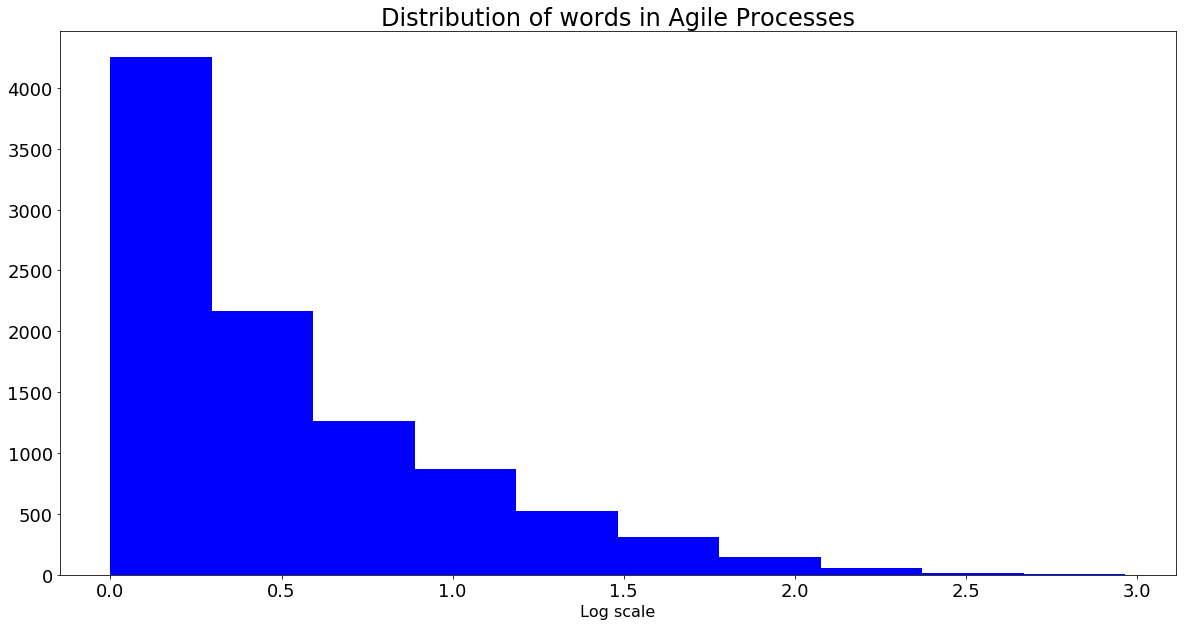

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Converting to numpy arrays
APSEEP_numericvalues = APSEEP_KV_STOP.map(lambda x : x[1]).collect()
APSEEP_numericvalues_np = np.array(APSEEP_numericvalues)

# Plotting
plt.figure(figsize = (20, 10))
plt.hist(np.log10(APSEEP_numericvalues_np), color = "blue")
plt.title("Distribution of words in Agile Processes", fontsize = 24)
plt.xlabel("Log scale", fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()


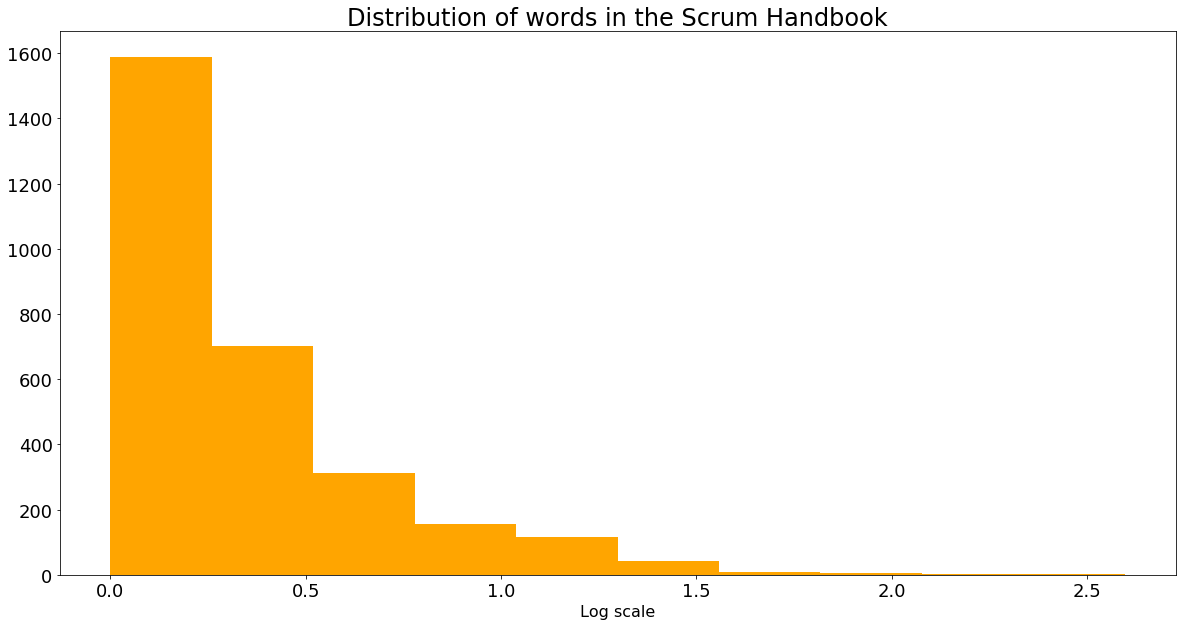

In [58]:
# Converting to numpy arrays
SH_numericvalues = SH_KV_STOP.map(lambda x : x[1]).collect()
SH_numericvalues_np = np.array(SH_numericvalues)

# Plotting
plt.figure(figsize = (20, 10))
plt.hist(np.log10(SH_numericvalues_np), color = "orange")
plt.title("Distribution of words in the Scrum Handbook", fontsize = 24)
plt.xlabel("Log scale", fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()


Next, I compare the top 15 most common words in Scrum Handbook and Agile Processes. 

To do this, I find the top 15 words using `.takeOrdered()`, then find the frequencies of these words by converting the words and their counts to two separate lists. Finally, I plot these frequencies using matplotlib.

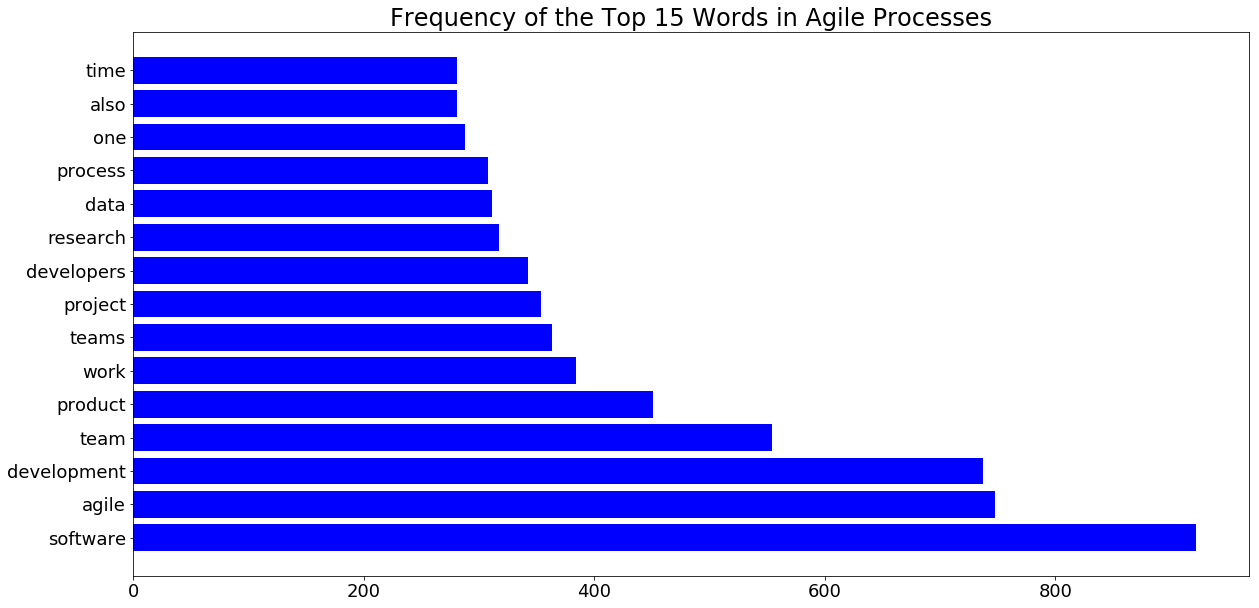

In [62]:
# Find the top 15 words
APSEEP_TOP_15 = APSEEP_KV_STOP.takeOrdered(15, lambda x : -x[1])

# Find the frequencies of these words
APSEEP_words = [x[0] for x in APSEEP_TOP_15]
APSEEP_count = [x[1] for x in APSEEP_TOP_15]

# Plot the frequencies
plt.figure(figsize=(20,10)) 
plot_apseep_15 = plt.barh(APSEEP_words, APSEEP_count, color="blue")

# Formatting
plt.title("Frequency of the Top 15 Words in Agile Processes", fontsize = 24)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylabel("")

# Display the plot
plt.show() 


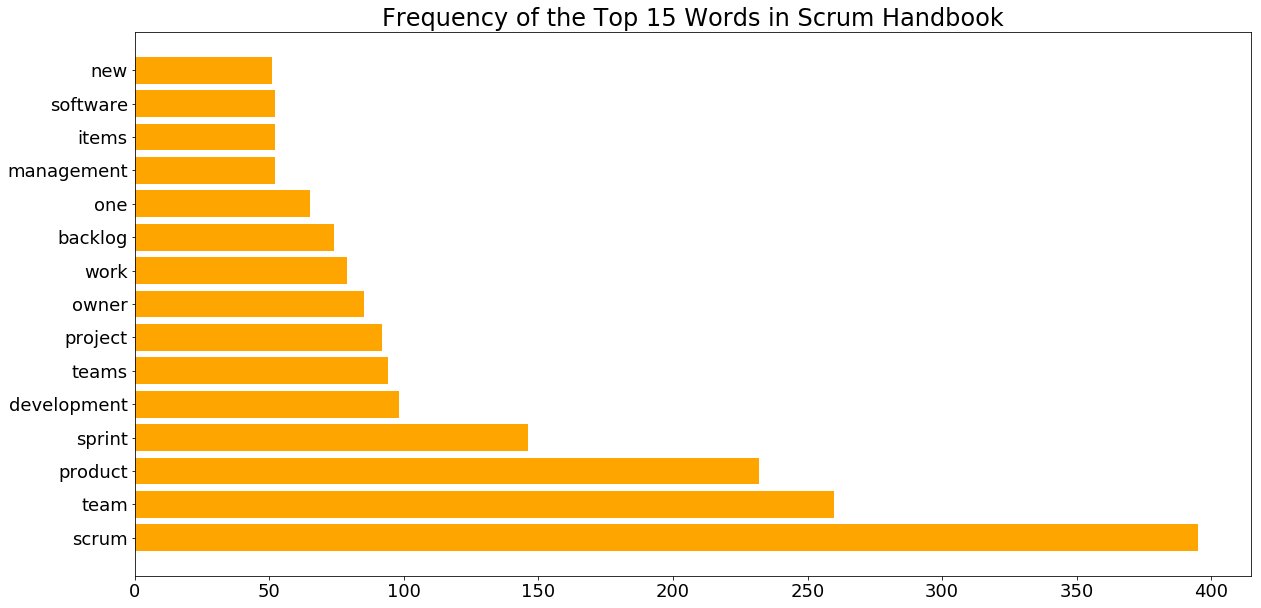

In [63]:
# Find the top 15 words
SH_TOP_15 = SH_KV_STOP.takeOrdered(15, lambda x : -x[1])

# Find the frequencies of these words
SH_words = [x[0] for x in SH_TOP_15]
SH_count = [x[1] for x in SH_TOP_15]

# Plot the frequencies
plt.figure(figsize=(20,10)) 
plot_sh_15 = plt.barh(SH_words, SH_count, color="orange")

# Formatting
plt.title("Frequency of the Top 15 Words in Scrum Handbook", fontsize = 24)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.ylabel("")

# Display the plot
plt.show() 


As can be seen in the above graphs, the top word in Agile Processes is 'software', which is unsurprising as this is a textbook about agile processes in software engineering/programming, and thus has words like 'development', 'research' and 'data'. This is because after having cleaned the text up from any noise, the most frequent words in the text are made up of mostly domain-specific words. 

Similarly, with Scrum Handbook, the most common word is 'scrum' (with almost 400 entries), which is an agile process framework, and what the book is centred around. Again, domain-specific words are seen here.
